In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import random
%matplotlib inline
import re
import warnings

In [2]:
#Notes/idead/thoughts

# success rate of gpu's
# what does job termination mean - lose work? means that calculating time is important
#requested jobs used time and terminated -why a buffer
#......................................................
#failures by user - who and not completeing - using a lot of resources 
#failed jobs - bad users or hardware failure (exitcode)
#envoriment side  -- first value user - exitcode, second environment 

#'0:9 and 0:15 are the most common exit codes for jobs with some version of the state of "CANCELLED"

#asking for enough memory/types of failures
#asking too much memory

In [3]:
warnings.filterwarnings(action='ignore', category= FutureWarning)

In [4]:
accre = pd.read_csv('accre-gpu-jobs-2022-v2.csv', on_bad_lines='skip')
#accre

In [5]:
accre = pd.DataFrame(accre)
#accre

In [6]:
accre['USEDMEM'] = accre['USEDMEM'].str.replace(r'[a-zA-Z]','')
#accre

In [7]:
accre['REQTIME'] = accre['REQTIME'].astype(str)
accre['USEDTIME'] = accre['USEDTIME'].astype(str)
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'].str.replace('-',' days '))
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'].str.replace('-',' days '))
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'], unit = 'S')
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'], unit = 'S')
accre = accre[accre['USEDMEM'].map(len) > 1]
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,2 days 00:00:00,0 days 00:13:13,1,2,1,pascal,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,0 days 05:00:00,0 days 00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,0 days 20:00:00,0 days 05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,0 days 15:00:00,0 days 04:11:10,1,1,1,pascal,0:0,COMPLETED
5,32880721,glasshouse,brady,403.40,3 days 12:00:00,0 days 18:49:36,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,5 days 00:00:00,0 days 00:00:52,1,1,1,turing,0:0,COMPLETED
336934,46753820_26,harovin,porsha,5093.70,5 days 00:00:00,0 days 00:34:51,1,6,1,turing,0:0,COMPLETED
336936,46753823,harovin,shannon,156.21,5 days 00:00:00,0 days 00:04:03,1,1,1,turing,0:0,COMPLETED
336942,46754095,harovin,shannon,2820.52,5 days 00:00:00,0 days 00:11:13,1,1,1,turing,0:0,COMPLETED


In [8]:
accre_glasshouse = accre[accre['ACCOUNT'] == 'glasshouse']
accre_virginia = accre[accre['ACCOUNT'] == 'virginia']
accre_malanga = accre[accre['ACCOUNT'] == 'malanga']
accre_prince = accre[accre['ACCOUNT'] == 'prince']
accre_prince = accre[accre['ACCOUNT'] == 'prince']
accre_grisette = accre[accre['ACCOUNT'] == 'grisette']
accre_harovin = accre[accre['ACCOUNT'] == 'harovin']
accre_antares = accre[accre['ACCOUNT'] == 'antares']
accre_sunburst = accre[accre['ACCOUNT'] == 'sunburst']
accre_pasilla = accre[accre['ACCOUNT'] == 'pasilla']
accre_plumcot = accre[accre['ACCOUNT'] == 'plumcot']
accre_pecans = accre[accre['ACCOUNT'] == 'pecans']
accre_kinnow = accre[accre['ACCOUNT'] == 'kinnow']
accre_bertanne = accre[accre['ACCOUNT'] == 'bertanne']
accre_almonds = accre[accre['ACCOUNT'] == 'almonds']
accre_apple = accre[accre['ACCOUNT'] == 'apple']
accre_cactus = accre[accre['ACCOUNT'] == 'cactus']

In [9]:
accre_glasshouse_failed_count = accre_glasshouse[accre_glasshouse['STATE'] == 'FAILED']
#accre_glasshouse_failed_count.info()
accre_glasshouse_fail_pct = 250/234998


In [10]:
accre_virginia_failed_count = accre_virginia[accre_virginia['STATE'] == 'FAILED']
#accre_virginia_failed_count.info()
accre_virginia_fail_pct = 0/9488

In [11]:
accre_malanga_failed_count = accre_malanga[accre_malanga['STATE'] == 'FAILED']
#accre_malanga_failed_count.info()
accre_malanga_fail_pct = 0/8157

In [12]:
accre_prince_failed_count = accre_prince[accre_prince['STATE'] == 'FAILED']
#accre_prince_failed_count
accre_prince_fail_pct = 0/7174

In [13]:
accre_malanga_failed_count = accre_malanga[accre_malanga['STATE'] == 'FAILED']
#accre_malanga_failed_count.info()
accre_malanga_fail_pct = 0/8157

In [14]:
accre_grisette_failed_count = accre_grisette[accre_grisette['STATE'] == 'FAILED']
#accre_grisette_failed_count.info()
accre_grisette_fail_pct = 1/5242

In [15]:
accre_harovin_failed_count = accre_harovin[accre_harovin['STATE'] == 'FAILED']
#accre_harovin_failed_count.info()
accre_harovin_fail_pct = 4/4534

In [16]:
accre_antares_failed_count = accre_antares[accre_antares['STATE'] == 'FAILED']
#accre_antares_failed_count.info()
accre_antares_fail_pct = 0/3015

In [17]:
accre_sunburst_failed_count = accre_sunburst[accre_sunburst['STATE'] == 'FAILED']
#accre_sunburst_failed_count.info()
accre_sunburst_fail_pct = 87/1505

In [18]:
accre_pasilla_failed_count = accre_pasilla[accre_pasilla['STATE'] == 'FAILED']
#accre_pasilla_failed_count.info()
accre_pasilla_fail_pct = 1/1263

In [19]:
accre_plumcot_failed_count = accre_plumcot[accre_plumcot['STATE'] == 'FAILED']
#accre_plumcot_failed_count.info()
accre_plumcot_fail_pct = 0/790

In [20]:
accre_pecans_failed_count = accre_pecans[accre_pecans['STATE'] == 'FAILED']
#accre_pecans_failed_count.info()
accre_pecans_fail_pct = 0/576

In [21]:
accre_kinnow_failed_count = accre_kinnow[accre_kinnow['STATE'] == 'FAILED']
#accre_kinnow_failed_count.info()
accre_kinnow_fail_pct = 0/406

In [22]:
accre_bertanne_failed_count = accre_bertanne[accre_bertanne['STATE'] == 'FAILED']
#accre_bertanne_failed_count.info()
accre_bertanne_fail_pct = 1/198

In [23]:
accre_almonds_failed_count = accre_almonds[accre_almonds['STATE'] == 'FAILED']
#accre_almonds_failed_count.info()
accre_almonds_fail_pct = 6/197

In [24]:
accre_apple_failed_count = accre_apple[accre_apple['STATE'] == 'FAILED']
#accre_apple_failed_count.info()
accre_apple_fail_pct = 11/186

In [25]:
accre_cactus_failed_count = accre_cactus[accre_cactus['STATE'] == 'FAILED']
#accre_cactus_failed_count.info()
accre_cactus_fail_pct = 0/113

In [26]:
accre_clara_failed_count = accre_cactus[accre_cactus['STATE'] == 'FAILED']

In [27]:
accre_cactus_failed_count = accre_cactus[accre_cactus['STATE'] == 'FAILED']

In [28]:
accre_cactus_failed_count = accre_cactus[accre_cactus['STATE'] == 'FAILED']

In [29]:
accre_account_fail_pct = pd.DataFrame({'ACCOUNT': ['glasshouse', 'virginia', 'malanga',
              'prince', 'grisette', 'harovin',
              'sunburst', 'pasilla', 'plumcot',
              'pecans', 'kinnow', 'bertanne',
              'almonds', 'apple', 'cactus'],
              
              'PERCENT_FAIL': [accre_glasshouse_fail_pct, accre_virginia_fail_pct, accre_malanga_fail_pct,
               accre_prince_fail_pct, accre_grisette_fail_pct, accre_harovin_fail_pct,
               accre_sunburst_fail_pct, accre_pasilla_fail_pct, accre_plumcot_fail_pct,
               accre_pecans_fail_pct, accre_kinnow_fail_pct, accre_bertanne_fail_pct,
               accre_almonds_fail_pct, accre_apple_fail_pct, accre_cactus_fail_pct]})

<AxesSubplot:title={'center':'Failed Percentages for Accounts with 100+ Jobs'}, ylabel='ACCOUNT'>

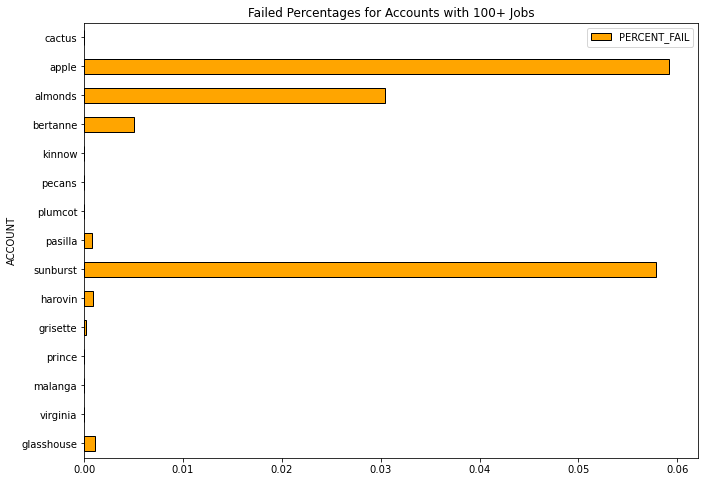

In [30]:
#accre_account_fail_pct                            #This is the fail percent for all jobs for Accounts with over 100 jobs#


accre_account_fail_pct.set_index('ACCOUNT').plot(kind = 'barh', color = ['orange', 'blue', 'gray'], edgecolor = 'black', figsize=(11,8), title = 'Failed Percentages for Accounts with 100+ Jobs') #***Change to multicolor bars****#

In [31]:
#accre['USEDMEM'] = accre['USEDMEM'].astype(float)
#accre['ACCOUNT'].value_counts()

In [61]:
accre_user = accre[['ACCOUNT','USER','STATE']].value_counts()
accre_failed_user = pd.DataFrame(accre_user)
accre_failed_user

0
ACCOUNT     USER    STATE            
glasshouse  marnie  COMPLETED  140724
            margret COMPLETED   58839
            collins COMPLETED   13279
virginia    hillery COMPLETED    8404
malanga     arline  COMPLETED    8108
...                               ...
glasshouse  hillery FAILED          1
horseradish annabel COMPLETED       1
bertanne    reino   CANCELLED       1
glasshouse  gibson  COMPLETED       1
apple       diandra FAILED          1

[260 rows x 1 columns]

In [56]:
accre_failed = accre.groupby(['USER', 'STATE'], as_index=False)
accre_failed_df = pd.DataFrame(accre_failed)
accre_failed_df.head(40)

,0,1
0,"(abigail, COMPLETED)",JOBID ACCOUNT USER USEDMEM...
1,"(adalyn, COMPLETED)",JOBID ACCOUNT USER USEDMEM ...
2,"(adolfo, COMPLETED)",JOBID ACCOUNT USER USEDMEM ...
3,"(alba, COMPLETED)",JOBID ACCOUNT USER USEDMEM ...
4,"(aleah, COMPLETED)",JOBID ACCOUNT USER USEDMEM ...
5,"(alene, COMPLETED)",JOBID ACCOUNT USER USEDMEM ...
6,"(alexandre, COMPLETED)",JOBID ACCOUNT USER USED...
7,"(alf, COMPLETED)",JOBID ACCOUNT USER USEDMEM ...
8,"(aliza, COMPLETED)",JOBID ACCOUNT USER USEDMEM ...
9,"(almond, COMPLETED)",JOBID ACCOUNT USER USEDMEM ...


In [ ]:
accre_glasshouse_account_user = accre_glasshouse[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_virginia_account_user = accre_virginia[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_malanga_account_user = accre_malanga[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_prince_account_user = accre_prince[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_grisette_account_user = accre_grisette[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_harovin_account_user = accre_harovin[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_antares_account_user = accre_antares[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_sunburst_account_user = accre_sunburst[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_plumcot_account_user = accre_pasilla[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_pecans_account_user = accre_pecans[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_kinnow_account_user = accre_kinnow[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_bertanne_account_user = accre_bertanne[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_almonds_account_user = accre_almonds[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_cactus_account_user = accre_cactus[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_clara_account_user = accre_clara[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_orange_account_user = accre_orange[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_rosemarie_account_user = accre_rosemarie[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_horseradish_account_user = accre_horseradish[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_sugranineteen_account_user = accre_sugranineteen[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_white_account_user = accre_white[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_gem_account_user = accre_gem[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_pinole_account_user = accre_pinole[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_packham_account_user = accre_packham[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_bunch_account_user = accre_bunch[['USER', 'ACCOUNT', 'PARTITION']].value_counts()
accre_summer_account_user = accre_summer[['USER', 'ACCOUNT', 'PARTITION']].value_counts()

In [ ]:
#accre_apple[['USEDMEM', 'REQTIME', 'USEDTIME', 'STATE', 'EXITCODE']].value_counts()
#accre_apple_time_diff = accre_apple['REQTIME'] - accre_apple['USEDTIME']
#accre_apple_time_diff.describe()
#accre_apple['USEDMEM'].astype(float).describe()
accre_apple['USEDMEM'].info()

Apple:
    
    Total Jobs: 186
    Failed: 11 (6%) 
    Completed: 44 (26%)
    Cancelled: 116 (62%) 
    Cancelled by 50355: 11 (6%) 
    Cancelled by 161909: 4 (2%)

Partition:
    
    Turing: 185 (99%)
    Maxwell: 1 (1%)
        
Used Memory:
    
    Total Use: 2.9 KB
    Average: 5649.704785
        

ReqTime/UsedTime:
    
    Avg ReqTime: 3 days 18:58:23.225806451
    Avg UsedTime:  2 days 05:42:41.741935483
    Average Diff:  1 days 13:15:41.483870967

    


In [ ]:
#accre_sunburst[['REQTIME', 'USEDTIME', 'STATE', 'EXITCODE']].value_counts()
#accre_sunburst_time_diff = accre_sunburst['REQTIME'] - accre_sunburst['USEDTIME']
#accre_sunburst_time_diff.describe()
#accre_sunburst['USEDMEM'].astype(float).describe()
#accre_sunburst['USEDTIME'].describe()

Sunburst:
    
    Total Jobs: 1505, 
    Failed: 87 (6%) 
    Completed: 1388 (92%) 
    Cancelled: 12 (1%) 
    Cancelled by 649321: 11 (1%) 
    Cancelled by 0: 4 (002%)
        
Partition:
    
    Pascal: 1505 (100%)

       
Used Memory:
    
    Total Use: 23.5+ KB
    Average:  250.918525
        

ReqTime/UsedTime:
    
    Avg ReqTime:  3 days 23:48:50.232558139
    Avg UsedTime:  0 days 02:01:03.124916943
    Average Diff:  3 days 21:47:47.107641196

In [ ]:
#accre_almonds[['REQTIME', 'USEDTIME', 'STATE', 'EXITCODE']].value_counts()
#accre_almonds_time_diff = accre_almonds['REQTIME'] - accre_almonds['USEDTIME']
#accre_almonds_time_diff.describe()
#accre_almonds['USEDMEM'].astype(float).describe()
#accre_almonds['USEDTIME'].describe()

Almonds:

    Total Jobs: 197
    Failed: 6 (3%) 
    Completed: 184 (93%) 
    Cancelled: 7 (4%) 
    Cancelled by : 0 (0%) 
    Cancelled by : 0 (0%)
    
Partition:
    
    turing: 197 (100%)


Used Memory:
    
    Total Use:  3.1+ KB
    Average:  6726.124619
        

ReqTime/UsedTime:
    
    Avg ReqTime:    1 days 21:06:51.167512690
    Avg UsedTime:   0 days 03:19:40.614213197
    Average Diff:   1 days 17:47:10.553299492

In [ ]:
#accre_almonds[['USEDMEM','REQTIME', 'USEDTIME', 'STATE', 'EXITCODE']].value_counts()

In [ ]:
#Looking at Accounts Failed rate and who's fault#/distribution/Users from accounts-is there a individual who is failing/
#By what percent are they off/Do users get better with jobs-corr?   ** timeseries plot ***

In [ ]:
#This makes a horizontal dataframe#

In [ ]:
accre_account_fail_pct = pd.DataFrame([[ accre_glasshouse_fail_pct, accre_virginia_fail_pct, accre_malanga_fail_pct,
               accre_prince_fail_pct, accre_grisette_fail_pct, accre_harovin_fail_pct,
               accre_sunburst_fail_pct, accre_pasilla_fail_pct, accre_plumcot_fail_pct,
               accre_pecans_fail_pct, accre_kinnow_fail_pct, accre_bertanne_fail_pct,
               accre_almonds_fail_pct, accre_apple_fail_pct, accre_cactus_fail_pct]],
             
    columns = ['glasshouse', 'virginia', 'malanga',
              'prince', 'grisette', 'harovin',
              'sunburst', 'pasilla', 'plumcot',
              'pecans', 'kinnow', 'bertanne',
              'almonds', 'apple', 'cactus'])

In [ ]:
# .squeeze() converts df to series
#accre_list = pd.DataFrame(accre, columns=['USEDMEM'])
#accre_list = accre_list.squeeze()
